# Data Pre-Processing

## Importing libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

### Importing Data

In [42]:
df=pd.read_csv("EasyVisa.csv")

In [43]:
df.shape

(25480, 12)

In [44]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [45]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


## Data Cleaning
* Missing or Null values
* Duplicate Values
* Check Data types
* Understand Dataset

### Missing or Null values

In [46]:
features_with_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
features_with_na

[]

In [47]:
# Displaying the percentage of missing values for each feature
for feature in features_with_na:
    missing_percentage = np.round(df[feature].isnull().mean() * 100, 5)
    print(f"{feature}: {missing_percentage}% missing values")

**Observation:** No null values in the dataset

### Duplicate Values

In [48]:
df.duplicated().sum()

0

**Observation:** No duplicate values in the dataset

### Data Types

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


## Feature Engineering

In [50]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

We are dropping the `case_id` column from the dataset because it is a unique identifier that does not provide any meaningful information for our analysis or model training. Unique identifiers like this don't contribute to predicting the target variable and could introduce noise into the model.

In [51]:
# Dropping 'case_id' as it does not provide any meaningful information for the analysis
df=df.drop('case_id',axis=1)
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [52]:
df.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

The `yr_of_estab` (year of establishment) column represents the year a company was established, which is not directly useful for analysis. To make it more meaningful, we will convert it into `company_age` by subtracting the year of establishment from the current year. This transformation will give us the age of the company, which is more relevant for analysis and modeling.

In [53]:
from datetime import date

date_now=date.today()
current_year=date_now.year
current_year

2024

calculating the company age

In [54]:
df['company_age']=current_year-df['yr_of_estab']

In [55]:
df=df.drop('yr_of_estab',axis=1)
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,16
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,127
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,19


## Analysing features

### Numerical Features
**Note:** `O`stands for `object` data type, which is typically used for strings or categorical data in pandas. It essentially means `non-numerical` data.



In [99]:
# Identifying numerical features (i.e., columns that are not of object type)
num_features = list(df.select_dtypes(exclude="object").columns)
# Displaying the numerical feature columns and their count
print(f"Numerical Feature Columns: {num_features}")
print(f"Number of Numerical Features: {len(num_features)}")


Numerical Feature Columns: ['no_of_employees', 'prevailing_wage', 'company_age']
Number of Numerical Features: 3


### Categorical Features

In [57]:
# Identifying categorical features (i.e., columns with object data type)
cat_features = [col for col in df.columns if df[col].dtype == 'O']

# Displaying the categorical feature columns and their count
print(f"Categorical Feature Columns: {cat_features}")
print(f"Number of Categorical Features: {len(cat_features)}")


Categorical Feature Columns: ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']
Number of Categorical Features: 8


### Discrete Features
Discrete features can only take specific, distinct values. These are typically counted and cannot take fractional values.

**Examples:**

* Number of children (e.g., 0, 1, 2, 3)
* Number of cars (e.g., 1, 2, 3)
* Shoe size (e.g., 7, 8, 9)
  
**Characteristics:**

* Values are typically represented with integers (whole numbers).
* Discrete features have gaps between values (e.g., we can’t have 1.5 children).
* The range of values can be finite or infinite, but the values are distinct.

In [58]:
# Identifying discrete numerical features (i.e., numerical features with 25 or fewer unique values)
disc_features = [col for col in num_features if df[col].nunique() <= 25]

# Displaying the discrete numerical feature columns
disc_features


[]

### Continious features

Continuous features can take any value within a given range, including decimal (fractional) values. These are typically measured and can take an infinite number of values.

**Examples:**

* Height (e.g., 5.72 feet)
* Weight (e.g., 72.5 kg)
* Temperature (e.g., 98.6°F)

**Characteristics:**

* Values are often represented with floating-point numbers.
* Continuous features have a range (min to max) but can theoretically take any value within that range.
* In theory, there are no gaps between values.

In [59]:
# Identifying continuous numerical features (i.e., numerical features that are not discrete)
continuous_features = [col for col in num_features if col not in disc_features]

# Displaying the number of continuous numerical features
print('Number of Continuous Features:', len(continuous_features))


Number of Continuous Features: 3


## Split DataFrame into Inputs and Outputs
In this step, we split the DataFrame into two variables:

* **X:** This variable contains the independent columns (features) that will be used to make predictions.
* **y:** This variable contains the dependent column, specifically the case_status column, which we aim to predict.

Before splitting, we encode the case_status values to numerical format, where:

* `denied` is encoded as 0
* `certified` is encoded as 1

This encoding is necessary because machine learning models cannot interpret string labels directly; they require numerical representations to perform calculations effectively.

In [60]:
df.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'region_of_employment',
       'prevailing_wage', 'unit_of_wage', 'full_time_position', 'case_status',
       'company_age'],
      dtype='object')

In [61]:
X=df.drop('case_status',axis=1)
Y=df['case_status']

In [62]:
X.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,17
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,22
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,16
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,127
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,19


In [67]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   region_of_employment   25480 non-null  object 
 6   prevailing_wage        25480 non-null  float64
 7   unit_of_wage           25480 non-null  object 
 8   full_time_position     25480 non-null  object 
 9   company_age            25480 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 1.9+ MB


In [63]:
Y.head()

,case_status
0,Denied
1,Certified
2,Denied
3,Denied
4,Certified


In [64]:
# Encoding target column
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit and transform the 'case_status' column and create a new column in the DataFrame
Y = label_encoder.fit_transform(df['case_status'])

# Verifying the encoding
Y[:5]


array([1, 0, 1, 1, 0])

## Feature Transformation
### Continious Features

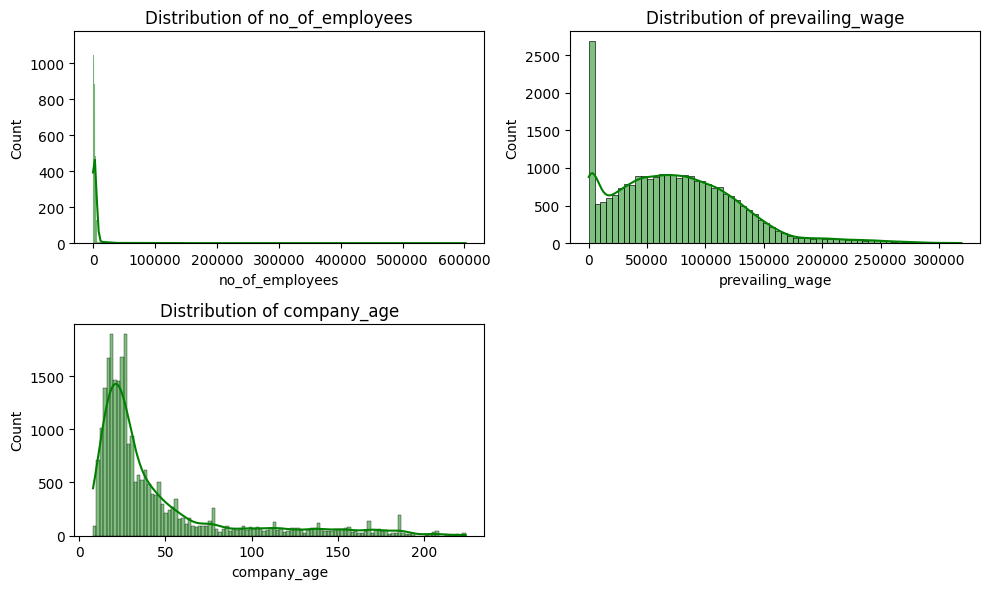

In [71]:
# Set the figure size
plt.figure(figsize=(10, 6))

# List of columns to plot
columns = ['no_of_employees', 'prevailing_wage', 'company_age']

# Create subplots for each column
for i, col in enumerate(columns):
    plt.subplot(2, 2, i + 1)  # Create a 2x2 grid for subplots
    sns.histplot(x=X[col], color='green', kde=True)  # Adding kernel density estimate (KDE) for better visualization
    plt.xlabel(col)
    plt.title(f'Distribution of {col}')  # Adding a title for clarity
    plt.tight_layout()

plt.show()  # Display the plots


**Skewness** refers to the asymmetry of the probability distribution of a real-valued random variable. It quantifies how much a distribution deviates from a symmetrical bell curve (normal distribution).

* A distribution is **positively skewed** (or right-skewed) if it has a longer tail on the right side.
* A distribution is **negatively skewed** (or left-skewed) if it has a longer tail on the left side.
* A normal distribution has a skewness of zero, indicating that it is perfectly symmetrical.


Understanding skewness is essential because many statistical techniques assume normality. Transforming skewed data can improve model performance and meet the assumptions of parametric tests.

#### Checking Skewness
To evaluate the skewness of the `no_of_employees`, `prevailing_wage` and `company_age` columns (**continious features**) in our dataset, we can use the following code:

In [73]:
skewness=X[['no_of_employees','prevailing_wage','company_age']].skew()#skewness for all continious_features
skewness

,0
no_of_employees,12.265260
prevailing_wage,0.755776
company_age,2.037301


Since `no_of_employees` and `company_age` columns exhibit skewness, we can apply a power transform to make the data more Gaussian-like. The `PowerTransformer` in `scikit-learn` can be used for this purpose. It supports the Box-Cox transform (for positive values) and the Yeo-Johnson transform (which can handle zero and negative values).



#### Apply the Yeo-Johnson Transform to the Skewed Columns
Apply Power (Yeo-Johnson) Transformer to Check if it can reduces the outliers

In [90]:
from sklearn.preprocessing import PowerTransformer

# Initialize the PowerTransformer with Yeo-Johnson
power_transformer = PowerTransformer(method='yeo-johnson')

transform_features=['no_of_employees','company_age']

# Applying the transformation
X_copy=power_transformer.fit_transform(X[transform_features])

In [93]:
# chaecking type for X_copy
type(X_copy)

numpy.ndarray

In [94]:
# turning numpy array to pandas dataframe
X_copy = pd.DataFrame(X_copy, columns=transform_features)
transofrmed_skewness=X_copy.skew(axis=0, skipna=True)
transofrmed_skewness

,0
no_of_employees,-2.183087
company_age,-0.025080


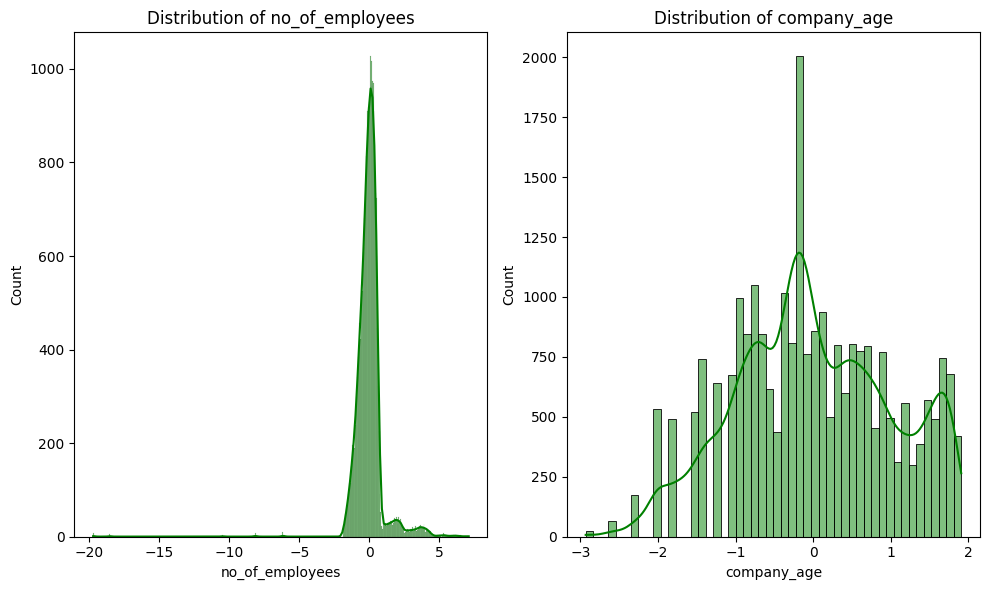

In [95]:
# Visualize the Columns to view unskewed results
# Set the figure size
plt.figure(figsize=(10, 6))

# Loop through each feature and create subplots
for i, col in enumerate(transform_features):
    plt.subplot(1, len(transform_features), i + 1)  # Dynamic subplot based on number of features
    sns.histplot(x=X_copy[col], color='green', kde=True)  # Adding KDE for smoother visualization
    plt.xlabel(col)
    plt.title(f'Distribution of {col}')  # Adding titles for clarity
    plt.tight_layout()

# Display the plots
plt.show()

### Categorical Features

In [96]:
# Display the number of unique values for each categorical feature
print("Unique values in categorical features:")
for feature in cat_features:
    unique_count = df[feature].nunique()
    print(f"{feature}: {unique_count}")


Unique values in categorical features:
continent: 6
education_of_employee: 4
has_job_experience: 2
requires_job_training: 2
region_of_employment: 5
unit_of_wage: 4
full_time_position: 2
case_status: 2


## Feature Encoding and Feature Scaling


Feature encoding and scaling are crucial preprocessing steps in preparing our data for machine learning models. These techniques ensure that the input data is in a suitable format and scale for effective modeling.

### 1. One-Hot Encoding

**One-Hot Encoding** is a method used to convert categorical variables with a **limited number of unique values** that are **not ordinal** into a numerical format. This encoding creates binary columns for each category, allowing machine learning algorithms to interpret categorical data effectively.

- **Purpose**: To facilitate better predictions by converting categorical variables into a format suitable for ML algorithms.
  
### 2. Ordinal Encoding

**Ordinal Encoding** is applied to categorical variables that have a **ranked order** among the categories. It is particularly useful for columns with **many unique categories**, where the order is significant.

- **Use Case**: For ordinal variables, which comprise a finite set of discrete values with a ranked ordering, Ordinal Encoding transforms the categorical values into integers based on their rank.
- **Implementation**: Label encoding is supported within column transformers, making it straightforward to integrate into preprocessing pipelines.

### 3. Standard Scaler

The **Standard Scaler** standardizes features by removing the mean and scaling them to unit variance. This scaling technique is essential for algorithms that are sensitive to the scale of the data (such as k-NN, SVM, etc.).

- **Purpose**: To ensure that all numerical features contribute equally to the distance calculations in algorithms that rely on feature scale.

### 4. Power Transformer

**Power Transforms** are techniques used to transform numerical input or output variables to follow a Gaussian or more Gaussian-like distribution. This transformation can help with modeling issues related to heteroscedasticity (non-constant variance) or other situations where normality is desired.

- **Types**: The **PowerTransformer** supports methods like Box-Cox and Yeo-Johnson for different types of data distributions.

### Selecting Features for Preprocessing

When selecting features for preprocessing, consider the following:

- **One-Hot Encoding**: Use for categorical features with a small number of unique values and no intrinsic order.
- **Ordinal Encoding**: Use for categorical features that have a natural order or ranking.
- **Standard Scaler**: Apply to all numerical features to standardize their scale.
- **Power Transformer**: Utilize for numerical features that exhibit skewness to make their distribution more Gaussian-like.


### Selecting Features for Preprocessing

In [98]:
num_features=list(X.select_dtypes(exclude="object").columns)
num_features

['no_of_employees', 'prevailing_wage', 'company_age']

### Preprocessing using Column Transformer

In [101]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define columns for different types of transformations
ordinal_columns = ['has_job_experience', 'requires_job_training', 'full_time_position', 'education_of_employee']
one_hot_columns = ['continent', 'unit_of_wage', 'region_of_employment']
transform_columns = ['no_of_employees', 'company_age']
numeric_features = num_features

# Create transformers for different types of data
numeric_transformer = StandardScaler()  # For scaling numerical features
one_hot_transformer = OneHotEncoder()   # For one-hot encoding categorical features
ordinal_transformer = OrdinalEncoder()   # For ordinal encoding of ranked categories

# Create a pipeline for the Power Transformer
transform_pipeline = Pipeline(steps=[
    ('power_transformer', PowerTransformer(method='yeo-johnson'))  # Apply Yeo-Johnson transformation
])

# Create a Column Transformer to apply the transformations
preprocessor = ColumnTransformer(
    transformers=[
        ("one_hot_encoder", one_hot_transformer, one_hot_columns),        # One-Hot Encoding
        ("ordinal_encoder", ordinal_transformer, ordinal_columns),         # Ordinal Encoding
        ("power_transform", transform_pipeline, transform_columns),        # Power Transformation
        ("standard_scaler", numeric_transformer, numeric_features)        # Standard Scaling
    ]
)


In [102]:
# Applying custom transform
X=preprocessor.fit_transform(X)
X

array([[ 0.        ,  1.        ,  0.        , ...,  1.51729976,
        -1.39853722, -0.95216153],
       [ 0.        ,  1.        ,  0.        , ...,  0.03091211,
         0.1698353 , -0.46294171],
       [ 0.        ,  1.        ,  0.        , ...,  2.88507606,
         0.91907852, -1.07581951],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.41388512,
         1.36027953,  1.54744459],
       [ 0.        ,  1.        ,  0.        , ..., -0.11194883,
         0.22150859,  1.68383399],
       [ 0.        ,  1.        ,  0.        , ...,  0.21874168,
        -0.06776315,  1.0229662 ]])